In [2]:
#Количество смертей в зависимости от возраста растет линейно.+
#Чем моложе человек, тем меньше у него шанс умерет от сердечной недостаточности
#Количество женщин, в более старшем возрасте под наблюдением превосходит мужчин+
#Пациенты с наличием гипертонии умирают чаще от сердечной недостаточности, чем те, у которых ее нет
#Наличие курения у людей 55+ лет повышает риск ссб+

In [3]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

<AxesSubplot:>

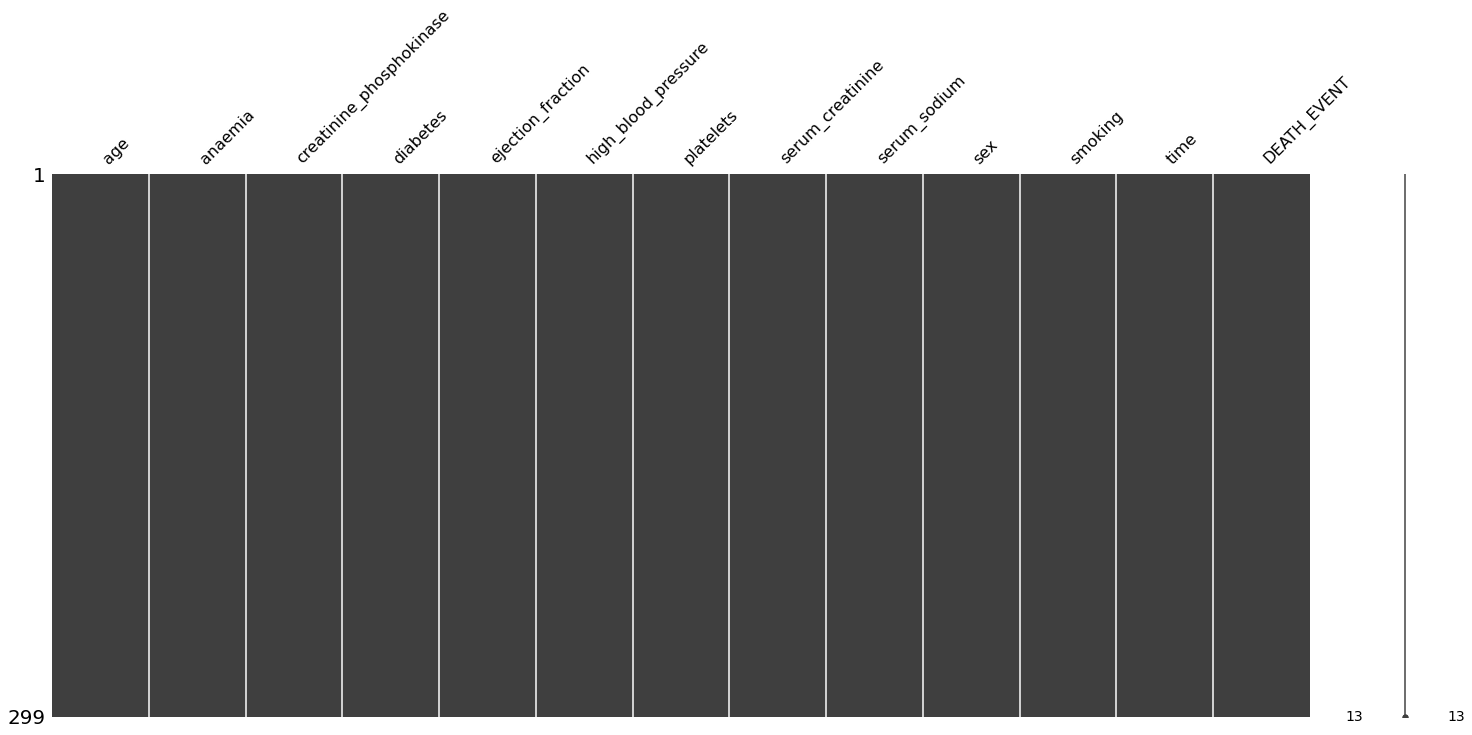

In [6]:
msno.matrix(df)

<AxesSubplot:>

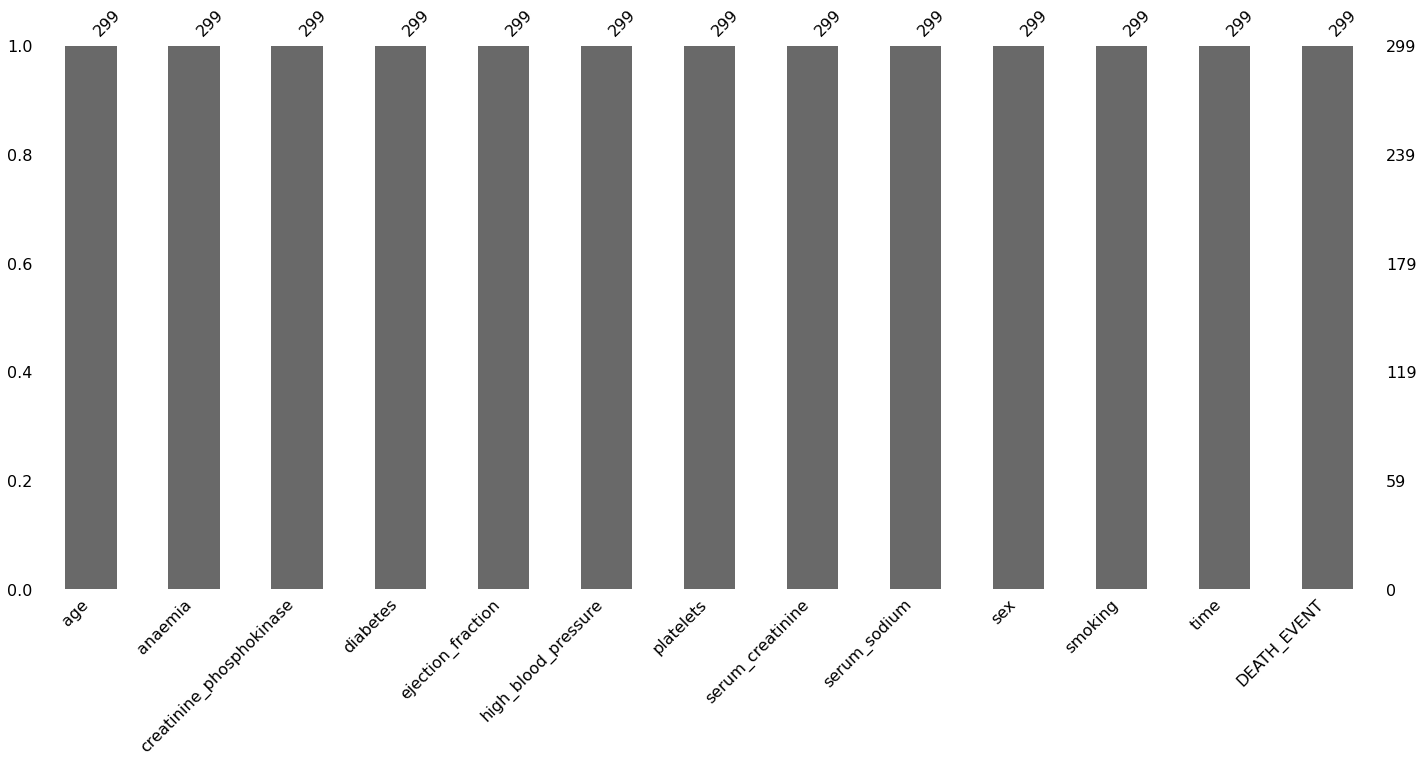

In [7]:
msno.bar(df)

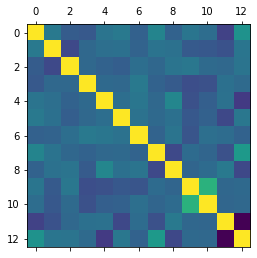

In [8]:
plt.matshow(df.corr())
plt.show()

In [9]:
import seaborn as sns
import numpy as np

In [10]:
#Количество пациентов в зависимости от возраста растет линейно. (надо посчитать количество умерших на каждый возраст)

In [11]:
from collections import OrderedDict
age_data1 = {age: df["age"].to_list().count(age) for age in set(df["age"])}
age_data = OrderedDict(sorted(age_data1.items(), key=lambda t: t[0]))
print(age_data)

OrderedDict([(40.0, 7), (41.0, 1), (42.0, 7), (43.0, 1), (44.0, 2), (45.0, 19), (46.0, 3), (47.0, 1), (48.0, 2), (49.0, 4), (50.0, 27), (51.0, 4), (52.0, 5), (53.0, 10), (54.0, 2), (55.0, 17), (56.0, 1), (57.0, 2), (58.0, 10), (59.0, 4), (60.0, 33), (60.667, 2), (61.0, 4), (62.0, 5), (63.0, 8), (64.0, 3), (65.0, 26), (66.0, 2), (67.0, 2), (68.0, 5), (69.0, 3), (70.0, 25), (72.0, 7), (73.0, 4), (75.0, 11), (77.0, 2), (78.0, 2), (79.0, 1), (80.0, 7), (81.0, 1), (82.0, 3), (85.0, 6), (86.0, 1), (87.0, 1), (90.0, 3), (94.0, 1), (95.0, 2)])


In [12]:
age_df = pd.DataFrame.from_dict(data=age_data, orient="index", columns=["Count"])
age_df.head()

,Count
40.0,7
41.0,1
42.0,7
43.0,1
44.0,2


In [13]:
age_df['Age'] = age_df.index
age_df.head()

,Count,Age
40.0,7,40.0
41.0,1,41.0
42.0,7,42.0
43.0,1,43.0
44.0,2,44.0


In [14]:
age_df.index = np.arange(len(age_df))
age_df.head()

,Count,Age
0,7,40.0
1,1,41.0
2,7,42.0
3,1,43.0
4,2,44.0


In [15]:
age_line = age_df[["Count", "Age"]].reset_index(drop=True).reset_index()

In [16]:
import plotly.express as px

In [17]:
fig = px.line(age_line, y="Count", x="Age", title="Количество пациентов")
fig.show()

In [18]:
#Количество женщин, в более старшем возрасте (60+) под наблюдением превосходит мужчин

In [19]:
age_df = pd.DataFrame.from_dict(data=age_data, orient="index", columns=["Count"])

In [20]:
#мужчины
male_df = df.loc[df["sex"] == 1]

In [21]:
#женщины
female_df = df.loc[df["sex"] == 0]

In [39]:
m_data = {age: male_df["age"].to_list().count(age) for age in set(male_df["age"])}
to_add_f_data = {age: 0 for age in set(df["age"]) if age not in set(male_df["age"])}
m_data.update(to_add_f_data)
age_m_df = pd.DataFrame.from_dict(data=m_data, 
                                  orient="index", 
                                  columns=["Males"])

In [52]:
f_data = {age: female_df["age"].to_list().count(age) for age in set(female_df["age"])}
to_add_m_data = {age: 0 for age in set(df["age"]) if age not in set(female_df["age"])}
f_data.update(to_add_m_data)
age_f_df = pd.DataFrame.from_dict(data=f_data, 
                                  orient="index", 
                                  columns=["Females"])

In [53]:
age_all = age_df.merge(age_m_df, left_index=True, right_index=True)
age_all = age_all.merge(age_f_df, left_index=True, right_index=True)


In [54]:
age_all['Age'] = age_all.index


In [55]:
age_all = age_all.drop(age_all[age_all.Age <= 61].index)
age_all.head()

,Count,Males,Females,Age
62.0,5,3,2,62.0
63.0,8,7,1,63.0
64.0,3,2,1,64.0
65.0,26,13,13,65.0
66.0,2,1,1,66.0


In [56]:
age_all.index = np.arange(len(age_all))
age_all.head()

,Count,Males,Females,Age
0,5,3,2,62.0
1,8,7,1,63.0
2,3,2,1,64.0
3,26,13,13,65.0
4,2,1,1,66.0


In [57]:
age_all = age_all.drop("Count", 1)
age_all.head()

,Males,Females,Age
0,3,2,62.0
1,7,1,63.0
2,2,1,64.0
3,13,13,65.0
4,1,1,66.0


In [58]:
x = age_all["Age"]
y1 = age_all["Males"]
y2 = age_all["Females"]

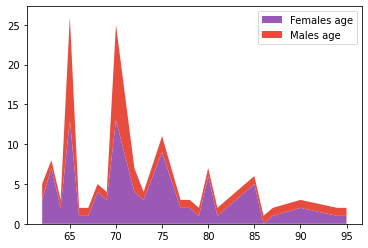

In [59]:
color_map = ["#9b59b6", "#e74c3c"]
plt.stackplot(x, y1, y2, labels=('Females age', 'Males age'), colors = color_map)
plt.legend(loc='upper right')
plt.show()

In [50]:
#Наличие курения у людей 55+ лет повышает риск ссб

In [102]:
smoke_df_alive = df.loc[(df['age'] > 55) & (df['DEATH_EVENT'] == 0) & (df['smoking'] == 1)].shape[0]
smoke_df_dead = df.loc[(df['age'] > 55) & (df['DEATH_EVENT'] == 1) & (df['smoking'] == 1)].shape[0]

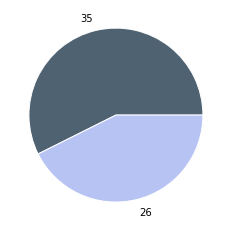

In [103]:
size_of_groups=[smoke_df_alive, smoke_df_dead]

# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

# Use it thanks to the color argument
plt.pie(size_of_groups, labels=size_of_groups, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);
plt.show()
